# Multi-media Information Processing (EECE 7217) 

## Assignment 2

University of Memphis, Spring 2023

Bereket Kebede, Gradaute Student, EECE, U00827234 <br>
For this assignment, we are using a dataset from the UCI machine learning repository. <br>

Instructor: Prof. Michael Bartz

----

You will accomplish the following in this assignment with the Wheat Seeds data.

1. Write a randomizer program that selectively randomizes a percentage of the wheat seed features (a cell -- not a column or row).  

2. Select a learning algorithm or algorithms and use the imputing solutions from scikit learn to compare results from the unaffected original data.

Add these new features to your already existing GitHub repo for the wheat seeds work previously submitted.

In [1]:
####################################################
# import necessary libraries 

import pandas as pd
import os
import json
import time
import pickle
import requests
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


import sys
import csv
import pdb
import random

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

In [3]:
def randomize(arg_1,arg_2):
    error_rate = float(arg_2) / 100.0 
    print(error_rate)

    output = []
    pdb.set_trace()
    errors_inserted = 0
    with open(arg_1) as f:
        reader = csv.DictReader(f)
        output.append(reader.fieldnames)
        for line in reader:
            line_out = []
            for val in line.values():
                toss = random.random()
                if toss > error_rate:
                    line_out.append(float(val))
                else:
                    errors_inserted = errors_inserted + 1
                    line_out.append("")
            line_out[-1] = int(line_out[-1]) if line_out[-1] else ""
            output.append(line_out)

    print(f"Errors inserted {errors_inserted}")
    print()
    print(",".join(output[0]))
    for out in output[1:]:
        print(",".join(map(str,out)))
    return output

In [4]:
#randomize('seeds.csv',50)

In [5]:
####################################################
# retreive data

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
def fetch_data(fname='seeds_dataset.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [6]:
####################################################
# define the features

FEATURES  = [
    "area",
    "perimeter",
    "compactness",
    "length",
    "width",
    "asymmetry",
    "groove"
]

df = pd.read_csv(DATA, sep='\s+',names=FEATURES + ['target'])
display(df)

,area,perimeter,compactness,length,width,asymmetry,groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [70]:
total_col = df.shape[0]
error = 10 # adding 10 per error
feat = FEATURES[4]
num = int((error/100)*total_col)
print(num)
print(feat)

21
width


In [63]:
df_new = df.copy()
my_rows = random.sample(range(0, total_col), num) # selects error% random samples from the total row under feat column
my_rows

[76,
 187,
 58,
 166,
 0,
 137,
 102,
 16,
 85,
 177,
 88,
 83,
 108,
 99,
 17,
 152,
 138,
 117,
 128,
 105,
 190]

In [64]:
for i in range(num):
    df_new.loc[my_rows[i], feat] = 0 # randomly zeros rows in the selected feature

In [65]:
df_new

,area,perimeter,compactness,length,width,asymmetry,groove,target
0,15.26,14.84,0.8710,5.763,0.000,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [66]:
X = df.loc[:, FEATURES]
y = df.loc[:, 'target']


X_new = df_new.loc[:, FEATURES]
y_new = df_new.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [46 52 49]
Labels counts in y_test: [24 18 21]


## Logistic Regression

## With 10% error

predicted: [2 3 2 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 3 2 2 3 1 3 1 3 3 2 3 3 2 1 3 3 3
 3 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 3 1 3 3 3 3 2 3 2]
true class: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 1 3 2 1 2]

-----------------metrics-------------------------

precision    0.842053
recall       0.793651
accuracy     0.793651
f1           0.790842
dtype: float64


C:\Users\Berek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


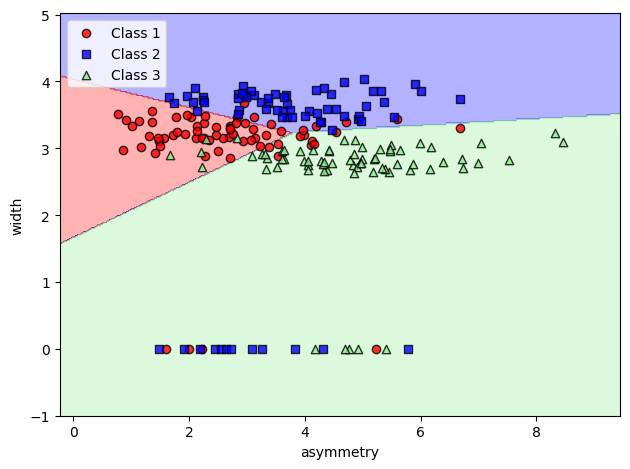

In [67]:
selecte_feature_1 = FEATURES[5]
selecte_feature_2 = FEATURES[4]

lr = LogisticRegression()
lr.fit(X_train.loc[:, [selecte_feature_1, selecte_feature_2]],
       y_train)

expected  = np.array(y_test_new)
predicted = lr.predict(X_test_new.loc[:, [selecte_feature_1, selecte_feature_2]])

print('predicted:', predicted)
print('true class:', expected)

print('\n-----------------metrics-------------------------\n')
scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))
print(pd.DataFrame(scores).mean())

plot_decision_regions(X_new.loc[:, [selecte_feature_1, selecte_feature_2]].to_numpy(),
                      y, classifier=lr)

#plt.title('not hello')
plt.xlabel(selecte_feature_1)
plt.ylabel(selecte_feature_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## With no error, Original

predicted: [2 3 2 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 2 2 3 1 3 1 3 3 2 2 2 2 1 2 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 3 1 3 3 3 3 2 3 2]
true class: [1 3 1 3 1 2 1 3 3 3 2 1 1 1 1 3 3 1 1 1 1 1 2 3 1 3 1 3 1 2 2 2 2 1 1 2 3
 2 1 3 1 3 2 3 2 2 3 3 2 3 2 3 2 2 1 1 3 3 1 3 2 1 2]

-----------------metrics-------------------------

precision    0.894719
recall       0.873016
accuracy     0.873016
f1           0.866253
dtype: float64


C:\Users\Berek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


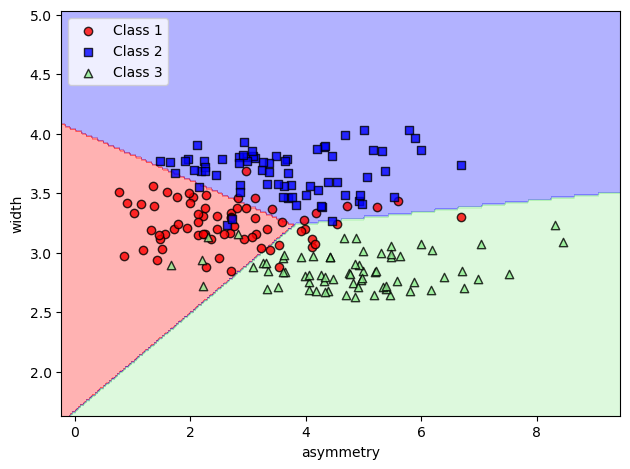

In [68]:
selecte_feature_1 = FEATURES[5]
selecte_feature_2 = FEATURES[4]

lr = LogisticRegression()
lr.fit(X_train.loc[:, [selecte_feature_1, selecte_feature_2]],
       y_train)

expected  = np.array(y_test)
predicted = lr.predict(X_test.loc[:, [selecte_feature_1, selecte_feature_2]])

print('predicted:', predicted)
print('true class:', expected)

print('\n-----------------metrics-------------------------\n')
scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))
print(pd.DataFrame(scores).mean())

plot_decision_regions(X.loc[:, [selecte_feature_1, selecte_feature_2]].to_numpy(),
                      y, classifier=lr)

#plt.title('not hello')
plt.xlabel(selecte_feature_1)
plt.ylabel(selecte_feature_2)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [69]:
# Accuracy with 10 percent error is 79.36% vs with no error 87.30%